In [18]:
import pandas as pd
pd.set_option('float_format', '{:f}'.format)

#import pandas_profiling as pp
import seaborn as sns
import warnings

import idx2numpy
from sklearn import preprocessing 

warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
file_Xtrain = '/Users/aryanchaudhary/IIITDelhiAssignments/SEMESTER-I/ML/Assignment-II/MNIST/train-images.idx3-ubyte'
X_train_arr = idx2numpy.convert_from_file(file_Xtrain)

file_ytrain = '/Users/aryanchaudhary/IIITDelhiAssignments/SEMESTER-I/ML/Assignment-II/MNIST/train-labels.idx1-ubyte'
y_train_arr = idx2numpy.convert_from_file(file_ytrain)

file_Xtest = '/Users/aryanchaudhary/IIITDelhiAssignments/SEMESTER-I/ML/Assignment-II/MNIST/t10k-images.idx3-ubyte'
X_test_arr = idx2numpy.convert_from_file(file_Xtest)

file_ytest = '/Users/aryanchaudhary/IIITDelhiAssignments/SEMESTER-I/ML/Assignment-II/MNIST/t10k-labels.idx1-ubyte'
y_test_arr = idx2numpy.convert_from_file(file_ytest)


In [23]:
# X_train_arr and X_test_arr are both 3D array of shape 60000x28x28 and 10000x28x28
# They both are converted to 2D array of shapes 60000x784 and 10000x784

X_train_arr = X_train_arr.reshape(60000, 784)
X_test_arr = X_test_arr.reshape(10000, 784)

In [24]:
train_dataset = pd.DataFrame(X_train_arr)
train_dataset['label'] = y_train_arr
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [25]:
test_dataset = pd.DataFrame(X_test_arr)
test_dataset['label'] = y_test_arr
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [26]:
df = pd.concat([train_dataset,test_dataset])
df.head()
df.shape

(70000, 785)

In [27]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(df.drop('label',axis=1), df['label'], test_size= 1 - train_ratio)


x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train.shape,y_train.shape, x_val.shape,y_val.shape, x_test.shape,y_test.shape)
#print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(48999, 784) (48999,) (7000, 784) (7000,) (14001, 784) (14001,)


In [29]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

x_train_scale = SS.fit_transform(x_train)
x_val_scale = SS.transform(x_val)
x_test_scale = SS.transform(x_test)


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
#ELbow plot
err =[]
for i in range(1,10):
    km= KMeans(n_clusters = i)
    km.fit(x_train_scale)
    err.append(km.inertia_)
err        


[35034284.99999999,
 33688250.9198973,
 32921237.86660642,
 32174745.027486637,
 31587912.20904182,
 31090812.131704036,
 30640766.335718006,
 30262386.750357255,
 29925942.90937709]

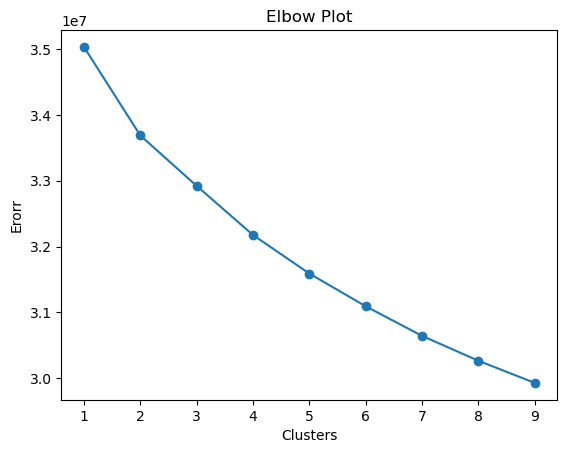

In [33]:
plt.plot(range(1,10),err,marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Erorr')
plt.title('Elbow Plot')
plt.show()

In [35]:
errr =[]
for i in range(9,15):
    km= KMeans(n_clusters = i)
    km.fit(x_train_scale)
    errr.append(km.inertia_)
errr        


[29925963.688393332,
 29619389.09875287,
 29349419.703951836,
 29104717.931824267,
 28879504.20482853,
 28658566.626227397]

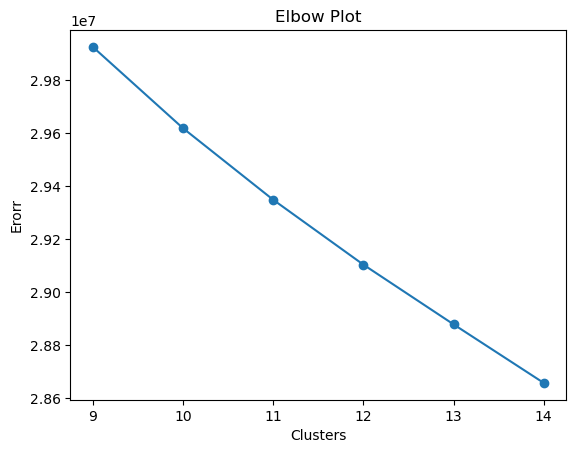

In [37]:
plt.plot(range(9,15),errr,marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Erorr')
plt.title('Elbow Plot')
plt.show()

In [39]:


#-- Create a clusterer that fits to 7 segments
k = 10
clusterer = KMeans(n_clusters=k)
clusterer.fit(x_train_scale)

#-- TODO: Predict the cluster for each data point
preds = clusterer.predict(x_train_scale)
    
#-- Calculate a silhouette score for the 7 segment solution
score = silhouette_score(x_train_scale, y_train, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))

For n_clusters = 10. The average silhouette_score is : -0.04246023737747111)


In [42]:
from sklearn.metrics import classification_report

In [45]:
for num in range(5,20):
    dtr = DecisionTreeClassifier(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 100,
     min_samples_split= 20,
     splitter='best')
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print(classification_report(y_test, pred))
    print('Clusters = ',np.unique(pred))
    
    
    

For max_leaf_nodes = 5
              precision    recall  f1-score   support

           0       0.28      0.77      0.41      1468
           1       0.40      0.35      0.37      1527
           2       0.38      0.35      0.37      1334
           3       0.21      0.80      0.33      1500
           4       0.00      0.00      0.00      1343
           5       0.00      0.00      0.00      1278
           6       0.00      0.00      0.00      1323
           7       0.56      0.65      0.60      1433
           8       0.00      0.00      0.00      1365
           9       0.00      0.00      0.00      1430

    accuracy                           0.30     14001
   macro avg       0.18      0.29      0.21     14001
weighted avg       0.19      0.30      0.22     14001

Clusters =  [0 1 2 3 7]
For max_leaf_nodes = 6
              precision    recall  f1-score   support

           0       0.69      0.31      0.43      1468
           1       0.00      0.00      0.00      1527
        

For max_leaf_nodes = 17
              precision    recall  f1-score   support

           0       0.59      0.24      0.34      1468
           1       0.82      0.85      0.84      1527
           2       0.29      0.42      0.34      1334
           3       0.38      0.27      0.32      1500
           4       0.58      0.29      0.39      1343
           5       0.33      0.31      0.32      1278
           6       0.37      0.62      0.46      1323
           7       0.40      0.75      0.52      1433
           8       0.50      0.10      0.17      1365
           9       0.46      0.54      0.50      1430

    accuracy                           0.44     14001
   macro avg       0.47      0.44      0.42     14001
weighted avg       0.48      0.44      0.42     14001

Clusters =  [0 1 2 3 4 5 6 7 8 9]
For max_leaf_nodes = 18
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1468
           1       0.53      0.79      0.63      1

In [46]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

In [49]:
for num in range(5,20):
    dtr = DecisionTreeClassifier(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 100,
     min_samples_split= 20,
     splitter='best')
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Clusters = ',np.unique(pred))
    print(f1_score(y_test, pred, average='micro'))
    print()
    
    
    

For max_leaf_nodes = 5
Clusters =  [0 1 6 7 9]
0.32583386900935646

For max_leaf_nodes = 6
Clusters =  [0 1 3 6 7 8]
0.3686879508606528

For max_leaf_nodes = 7
Clusters =  [1 2 3 5 6 7 8]
0.368759374330405

For max_leaf_nodes = 8
Clusters =  [0 1 2 3 6 7 8 9]
0.3491179201485608

For max_leaf_nodes = 9
Clusters =  [0 1 2 3 4 5 6 7]
0.3458324405399614

For max_leaf_nodes = 10
Clusters =  [1 2 3 4 6 7 8 9]
0.4051139204342547

For max_leaf_nodes = 11
Clusters =  [0 1 2 3 4 6 7 9]
0.46460967073780446

For max_leaf_nodes = 12
Clusters =  [0 1 2 3 4 5 6 7 9]
0.43904006856653094

For max_leaf_nodes = 13
Clusters =  [0 1 2 3 4 6 7 8]
0.47725162488393685

For max_leaf_nodes = 14
Clusters =  [0 1 2 3 4 6 7 8]
0.37583029783586885

For max_leaf_nodes = 15
Clusters =  [0 1 2 3 4 5 6 7 8 9]
0.45968145132490534

For max_leaf_nodes = 16
Clusters =  [0 1 2 3 4 5 6 7 8 9]
0.4997500178558674

For max_leaf_nodes = 17
Clusters =  [0 1 2 3 4 5 6 7 8 9]
0.47296621669880723

For max_leaf_nodes = 18
Clusters = 

In [50]:
url = 'https://raw.githubusercontent.com/shruti101/Segmented-Marketing-using-KNN-clustering/main/cluster_data'

In [58]:
df = pd.read_csv(url, sep=',',index_col='customer_number')

In [66]:
df = df.drop('Unnamed: 0', axis=1)
df

,Cluster,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
customer_number,,,,,,,,,,,,,,,,,,,,,
11387,5,64.580000,35.910000,107.780000,27.080000,29.590000,1.000000,54.830000,6.350000,22.830000,...,28.540000,2.000000,15.000000,7.480000,1.000000,0.840000,545,1.109980,697.760000,1.420000
8171,1,16.890000,37.240000,28.840000,33.430000,66.400000,1.000000,22.060000,12.090000,2.340000,...,3.760000,1.000000,1.000000,9.990000,1.000000,1.000000,330,1.235955,369.310000,1.380000
1060,0,87.300000,82.980000,49.880000,20.570000,37.040000,18.000000,9.850000,57.980000,31.120000,...,1.000000,18.000000,20.000000,106.460000,1.000000,1.000000,432,1.125000,668.680000,1.740000
3728,2,84.050000,186.560000,175.500000,119.840000,111.080000,1.000000,13.050000,25.540000,124.420000,...,1.000000,4.000000,1.000000,1.000000,1.000000,4.500000,1010,1.393103,1104.100000,1.520000
14621,1,35.160000,121.310000,79.230000,29.030000,37.170000,1.000000,40.060000,1.000000,4.680000,...,1.000000,1.000000,1.000000,3.400000,1.000000,1.000000,760,1.124260,524.450000,0.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,1,64.520000,73.840000,89.360000,135.310000,61.990000,1.000000,1.000000,61.020000,56.620000,...,3.360000,1.000000,1.000000,1.000000,1.000000,2.530000,851,1.113874,800.430000,1.050000
16081,4,5.910000,18.080000,18.320000,23.690000,16.120000,1.000000,5.390000,15.960000,0.670000,...,9.740000,30.000000,1.000000,1.000000,1.000000,1.610000,209,1.082902,222.260000,1.150000
7094,1,116.540000,106.080000,42.310000,35.920000,43.590000,1.000000,13.680000,1.780000,21.440000,...,2.590000,1.000000,1.000000,1.000000,1.000000,6.790000,354,1.085890,448.420000,1.380000


In [74]:
df.columns

Index(['Cluster', 'fruit_veg', 'dairy', 'confectionary', 'grocery_food',
       'grocery_health_pets', 'bakery', 'newspapers_magazines',
       'prepared_meals', 'soft_drinks', 'frozen', 'meat', 'tobacco', 'drinks',
       'deli', 'world_foods', 'lottery', 'cashpoint', 'seasonal_gifting',
       'discount_bakery', 'practical_items', 'total_quantity',
       'average_quantity', 'total_spend', 'average_spend'],
      dtype='object')

In [77]:
x = df.drop(['Cluster'] , axis =1)
y = df.Cluster

In [83]:
x

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
customer_number,,,,,,,,,,,,,,,,,,,,,
11387,64.580000,35.910000,107.780000,27.080000,29.590000,1.000000,54.830000,6.350000,22.830000,21.510000,...,28.540000,2.000000,15.000000,7.480000,1.000000,0.840000,545,1.109980,697.760000,1.420000
8171,16.890000,37.240000,28.840000,33.430000,66.400000,1.000000,22.060000,12.090000,2.340000,78.740000,...,3.760000,1.000000,1.000000,9.990000,1.000000,1.000000,330,1.235955,369.310000,1.380000
1060,87.300000,82.980000,49.880000,20.570000,37.040000,18.000000,9.850000,57.980000,31.120000,14.530000,...,1.000000,18.000000,20.000000,106.460000,1.000000,1.000000,432,1.125000,668.680000,1.740000
3728,84.050000,186.560000,175.500000,119.840000,111.080000,1.000000,13.050000,25.540000,124.420000,15.240000,...,1.000000,4.000000,1.000000,1.000000,1.000000,4.500000,1010,1.393103,1104.100000,1.520000
14621,35.160000,121.310000,79.230000,29.030000,37.170000,1.000000,40.060000,1.000000,4.680000,3.330000,...,1.000000,1.000000,1.000000,3.400000,1.000000,1.000000,760,1.124260,524.450000,0.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,64.520000,73.840000,89.360000,135.310000,61.990000,1.000000,1.000000,61.020000,56.620000,95.220000,...,3.360000,1.000000,1.000000,1.000000,1.000000,2.530000,851,1.113874,800.430000,1.050000
16081,5.910000,18.080000,18.320000,23.690000,16.120000,1.000000,5.390000,15.960000,0.670000,0.990000,...,9.740000,30.000000,1.000000,1.000000,1.000000,1.610000,209,1.082902,222.260000,1.150000
7094,116.540000,106.080000,42.310000,35.920000,43.590000,1.000000,13.680000,1.780000,21.440000,2.890000,...,2.590000,1.000000,1.000000,1.000000,1.000000,6.790000,354,1.085890,448.420000,1.380000


In [91]:
#ELbow plot
err_2 =[]
for i in range(1,50):
    km= KMeans(n_clusters = i)
    km.fit(x.values)
    err_2.append(km.inertia_)
err_2       


[1719388099.5780401,
 864239564.7242106,
 623979675.9250219,
 509797332.72119033,
 450349668.3113143,
 402105213.18654364,
 363388027.00687677,
 337525130.98170465,
 318668842.65738297,
 301416828.52962804,
 285681860.9310669,
 272336183.4414692,
 256312024.31111896,
 242628231.25039452,
 237483254.18754154,
 224151167.45246464,
 216902516.88623604,
 209744735.11248064,
 202219056.101392,
 197122468.9225792,
 191953606.35108462,
 188015845.3137514,
 182814406.41970968,
 180048780.8088237,
 176393933.1533639,
 171768140.81900895,
 169454161.48163658,
 166828792.40113434,
 164168168.1755718,
 160873838.10793108,
 160421237.5017567,
 155345058.2312711,
 153861358.6569132,
 150705768.1187693,
 149664799.17487907,
 147952761.02912673,
 144378616.86476552,
 143979881.44283685,
 142590784.3426535,
 140319207.49797678,
 139498582.46783298,
 138561939.2384047,
 135003434.17537844,
 135078553.08049303,
 132424475.72978751,
 130858452.5724687,
 130341197.70009653,
 129733286.59929335,
 128434149.

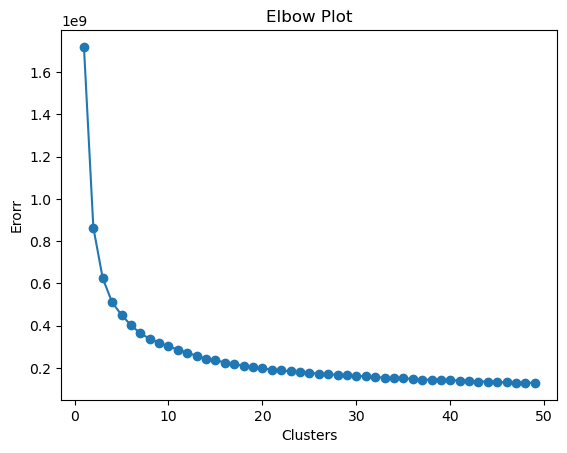

In [92]:
plt.plot(range(1,50) ,err_2,marker = 'o')

plt.xlabel('Clusters')
plt.ylabel('Erorr')
plt.title('Elbow Plot')
plt.show()

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Cluster','average_spend'],axis=1), df['average_spend'], test_size= 0.3)

In [95]:
for num in range(5,20):
    dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best'
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 5
Mean Squared Error 0.6003519144503341
Mean Absolute Error 0.4510262965091908
Root Mean Squared Error 0.77482379574348
Clusters =  [1.5309434  1.95974763 2.11104167 2.3730303  3.51142857]

For max_leaf_nodes = 6
Mean Squared Error 0.5303933600406996
Mean Absolute Error 0.42582941658501344
Root Mean Squared Error 0.7282810996041978
Clusters =  [1.478294   1.85679654 2.13292208 2.74875    2.9878     5.01083333]

For max_leaf_nodes = 7
Mean Squared Error 0.49470110828218444
Mean Absolute Error 0.437405562775077
Root Mean Squared Error 0.7033499188044202
Clusters =  [1.4866611  1.60868644 2.02706422 2.1327451  2.37115385 3.3325
 4.865     ]

For max_leaf_nodes = 8
Mean Squared Error 0.5943303361705019
Mean Absolute Error 0.4679847563463128
Root Mean Squared Error 0.7709282302332052
Clusters =  [1.5331032  1.75735537 1.91758621 1.94296296 2.5285     2.58117647
 2.8336     4.865     ]

For max_leaf_nodes = 9
Mean Squared Error 0.4998707668377746
Mean Absolute Error 0.42

In [103]:
from sklearn import tree

In [104]:
num = 11
dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', max_leaf_nodes=11,
                      min_samples_leaf=10, min_samples_split=5)

In [105]:
feats = x_train.columns

In [106]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dtr, out_file=dotfile, feature_names= feats)
dotfile.close()

In [107]:
dotfile.render

AttributeError: '_io.TextIOWrapper' object has no attribute 'render'

In [108]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_3 <= 15.84
|   |--- feature_11 <= 161.94
|   |   |--- value: [1.80]
|   |--- feature_11 >  161.94
|   |   |--- feature_3 <= 2.77
|   |   |   |--- value: [4.93]
|   |   |--- feature_3 >  2.77
|   |   |   |--- feature_20 <= 225.50
|   |   |   |   |--- value: [3.79]
|   |   |   |--- feature_20 >  225.50
|   |   |   |   |--- value: [2.41]
|--- feature_3 >  15.84
|   |--- feature_22 <= 727.67
|   |   |--- value: [1.44]
|   |--- feature_22 >  727.67
|   |   |--- feature_20 <= 494.50
|   |   |   |--- value: [2.74]
|   |   |--- feature_20 >  494.50
|   |   |   |--- feature_20 <= 696.50
|   |   |   |   |--- feature_22 <= 1050.92
|   |   |   |   |   |--- value: [1.73]
|   |   |   |   |--- feature_22 >  1050.92
|   |   |   |   |   |--- value: [2.73]
|   |   |   |--- feature_20 >  696.50
|   |   |   |   |--- feature_22 <= 1611.28
|   |   |   |   |   |--- value: [1.46]
|   |   |   |   |--- feature_22 >  1611.28
|   |   |   |   |   |--- feature_20 <= 1090.00
|   |   |   |   |   |   |---

In [109]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

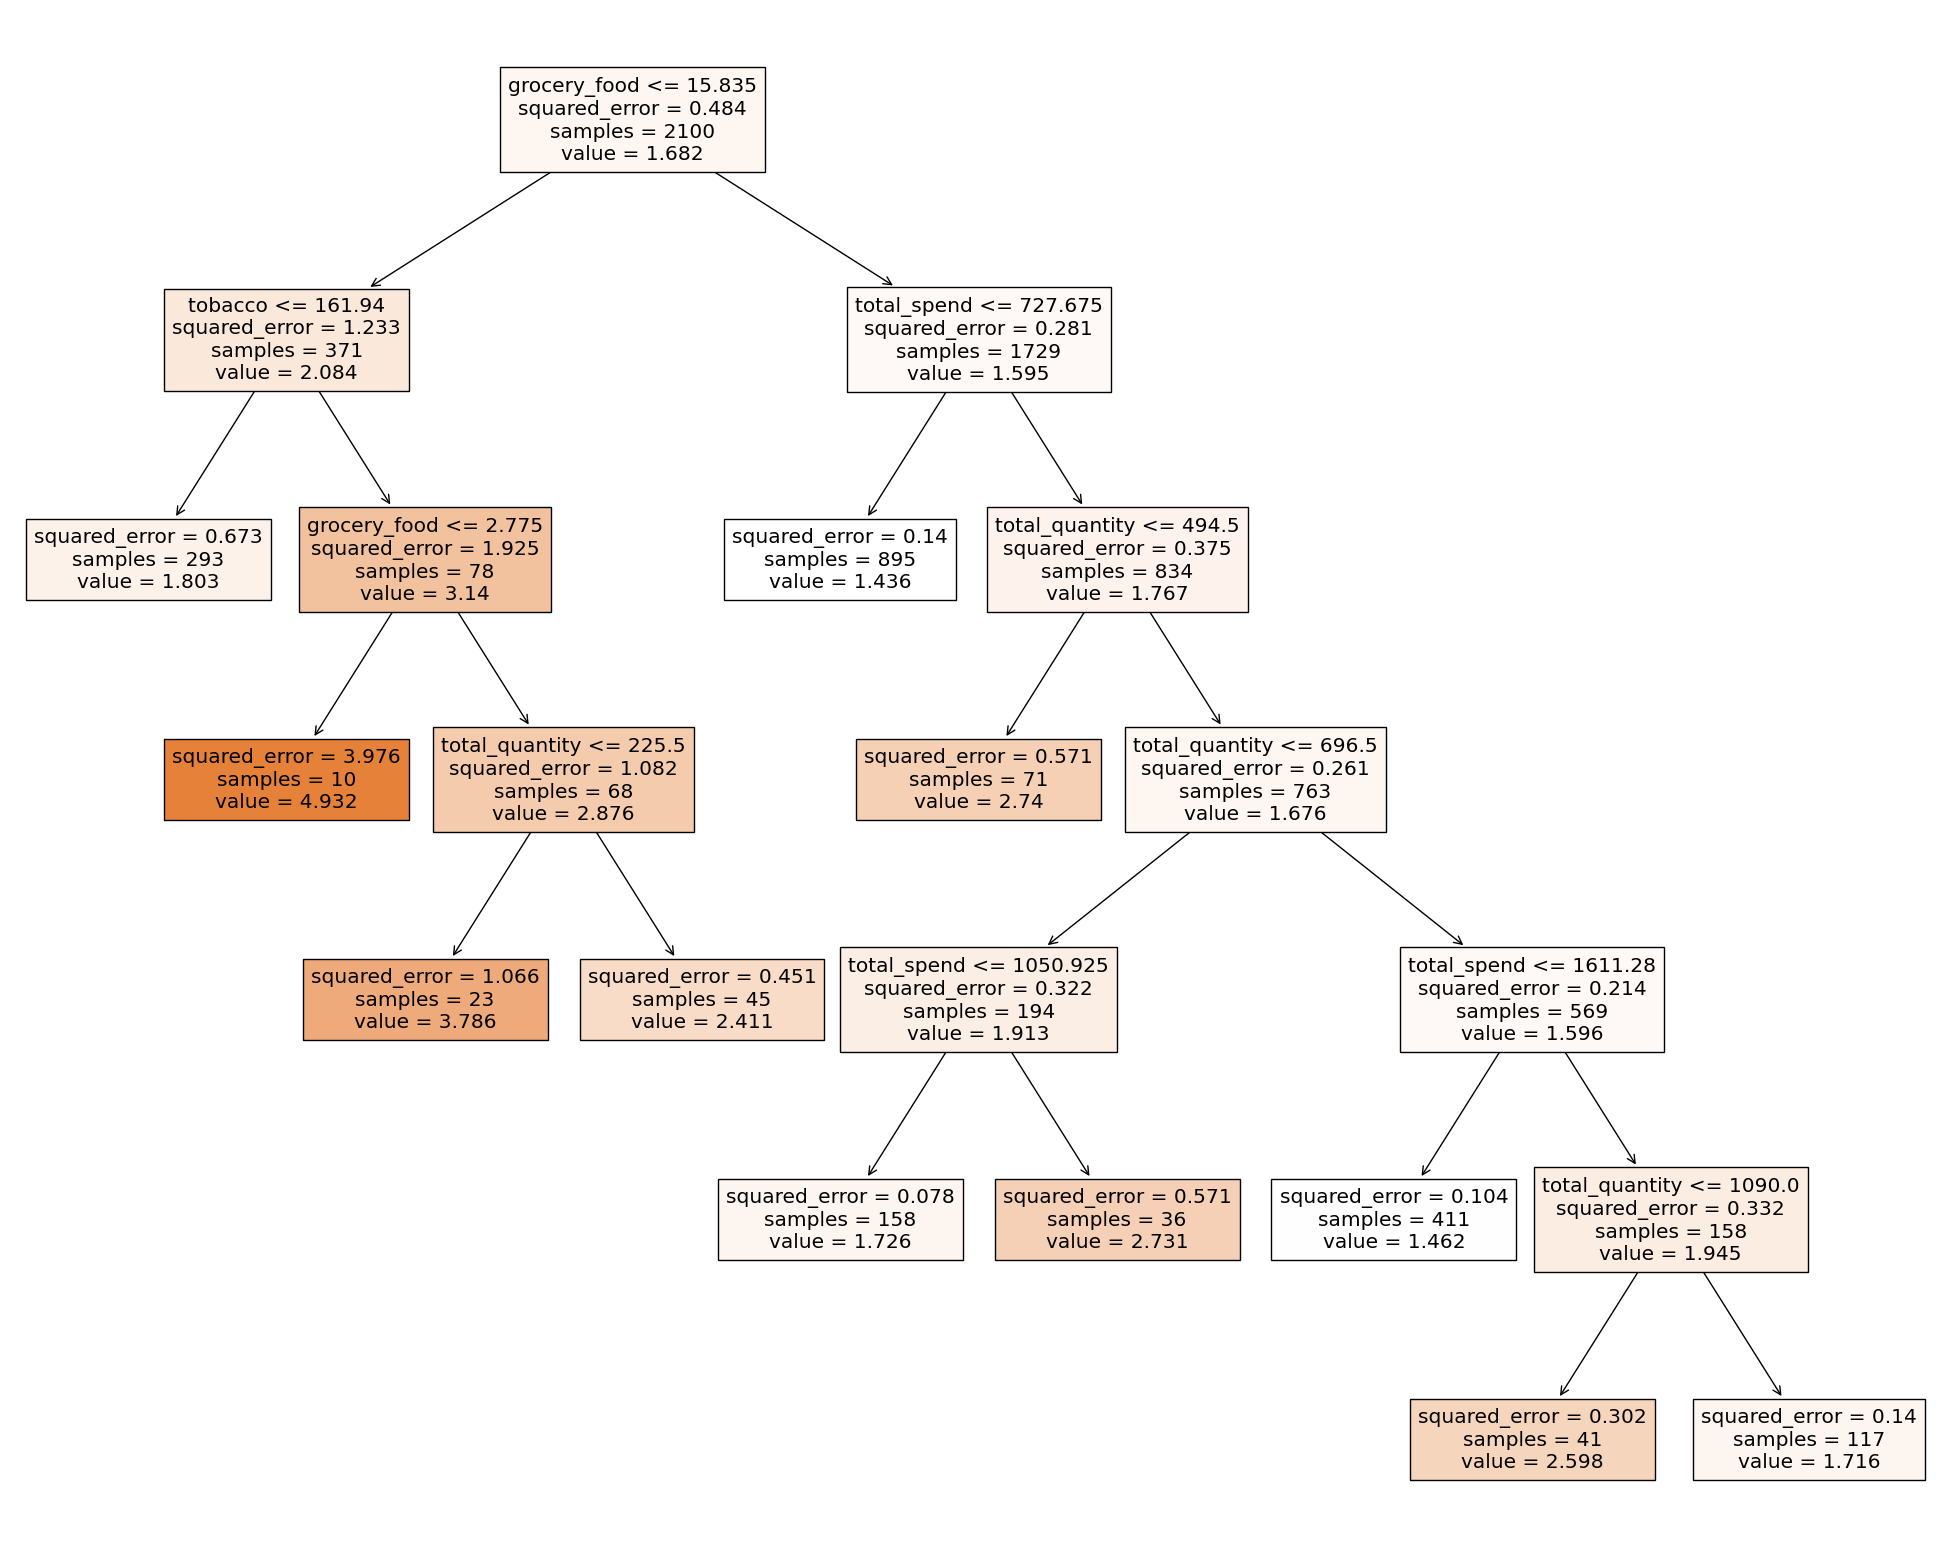

In [111]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=feats,  
                   
                   filled=True)

In [112]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=iris.feature_names,  
#                    class_names=iris.target_names,
#                    filled=True)

https://mljar.com/blog/visualize-decision-tree/

https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html